**Необходимо провести RFM - анализ клиентов, на основе данных онлайн-ретейла.**

Набор данных "Online Retail II" содержит информацию о продажах для компании в период с 01/12/2009 по 09/12/2011.

Большинство их клиентов — оптовики.

Переменные:

**InvoiceNo**: Номер счета. Уникальный номер для каждой транзакции. Если код начинается с буквы "C", это означает, что транзакция была отменена.

**StockCode**: Код товара. Уникальный номер для каждого продукта.

**Description**: Название продукта.

**Quantity**: Количество товара. Определяет, сколько единиц товара продано в рамках счета.

**InvoiceDate**: Дата и время выставления счета.

**UnitPrice**: Цена за единицу товара.

**CustomerID**: Уникальный идентификатор клиента.

**Country**: Название страны.

**RFM — это метод, используемый для анализа ценности клиентов.**

RFM расшифровывается как три ключевых параметра:

**Recency (давность)** – Как давно клиент совершал покупку?
(Чем более свежая покупка, тем выше вероятность повторного взаимодействия с клиентом.)

**Frequency (частота)** – Как часто клиент совершает покупки?
(Чем чаще клиент покупает, тем выше его лояльность.)

**Monetary (денежная ценность)** – Сколько клиент тратит?
(Чем больше сумма покупок, тем выше ценность клиента для бизнеса.)

Эти три параметра помогают сегментировать клиентов и разрабатывать персонализированные маркетинговые стратегии для повышения их вовлеченности и лояльности.

In [1]:
#Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\dimak\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Загружаем датасет

data = pd.read_excel(r'C:\Users\dimak\OneDrive\Рабочий стол\аналитика\online_retail_II.xlsx')

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
#Удаляем дубликаты

df = data.drop_duplicates()

In [6]:
# Удаляем отмененные операции

df = df[~df["Invoice"].str.contains("C", na = False)]

In [7]:
df['Customer ID'].nunique()

4314

In [8]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta',
       'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore', 'Thailand',
       'Israel', 'Lithuania', 'West Indies', 'Lebanon', 'Korea', 'Brazil',
       'Canada', 'Iceland'], dtype=object)

In [9]:
#Меняем название стран на привычные

df['Country'].replace({'EIRE':'Ireland', 'RSA':'South Africa'}, inplace=True)

C:\Users\dimak\AppData\Local\Temp\ipykernel_5972\3025835751.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace({'EIRE':'Ireland', 'RSA':'South Africa'}, inplace=True)


In [10]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia',
       'Ireland', 'Germany', 'Portugal', 'Denmark', 'Netherlands',
       'Poland', 'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta',
       'Bahrain', 'South Africa', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [11]:
# Отбираем операции, где количество товаров в чеке больше 0

df=df[df['Quantity']>0]

In [12]:
# Отбираем операции, где цена товара в чеке больше 0

df=df[df['Price']>0]

In [13]:
df.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    103814
Country             0
dtype: int64

In [14]:
#Удаляем пропуски

df = df.dropna()

In [15]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [16]:
# Создаем поле "total_price", в котором содердится информация о сумме покупки на котокретный вид товара в чеке

df['total_price'] = df['Price']*df['Quantity']

### Проводим RFM - анализ

In [17]:
df_recency = df.groupby(by='Customer ID',  as_index=False)['InvoiceDate'].max()

df_recency.columns = ['customer_id', 'Last_Purchase_Date']

recent_date = df_recency['Last_Purchase_Date'].max()

df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(
    lambda x: (recent_date - x).days)
df_recency.sort_values('Recency', ascending = False).head()

,customer_id,Last_Purchase_Date,Recency
3805,17592.0,2009-12-01 10:49:00,373
3396,17056.0,2009-12-01 12:55:00,373
3182,16763.0,2009-12-01 15:26:00,373
179,12636.0,2009-12-01 09:55:00,373
809,13526.0,2009-12-01 13:13:00,373


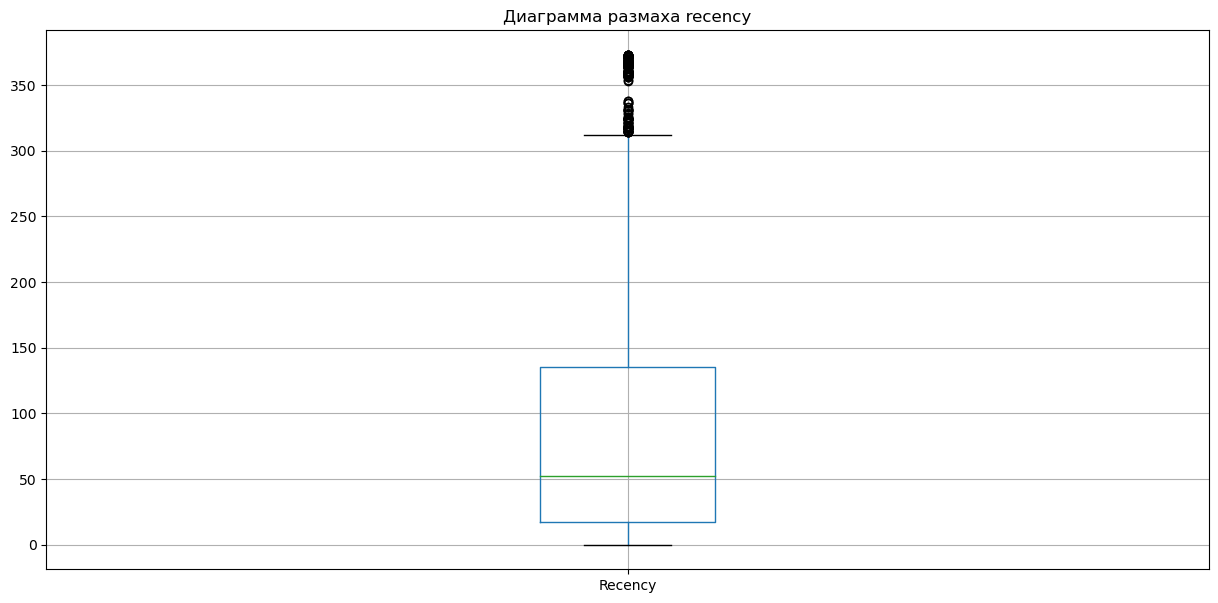

In [18]:
df_recency.boxplot(column=['Recency'], figsize=(15,7))
plt.title('Диаграмма размаха recency')
plt.show()

In [19]:
quantiles = df_recency['Recency'].quantile(q=[0.25,0.5,0.75])
quantiles

0.25     17.0
0.50     52.0
0.75    135.0
Name: Recency, dtype: float64

In [20]:
print( 'Максимальный показатель Recency:',df_recency['Recency'].max())
print( 'Минимальный показатель Recency:',df_recency['Recency'].min())
print( 'Средний показатель Recency:',df_recency['Recency'].mean())


Максимальный показатель Recency: 373
Минимальный показатель Recency: 0
Средний показатель Recency: 90.17184601113172


In [21]:
frequency_df = df.groupby(
    by=['Customer ID'], as_index=False)['Invoice'].nunique()
frequency_df.columns = ['customer_id', 'Frequency']
frequency_df.sort_values(by = 'Frequency', ascending = False).head()

,customer_id,Frequency
1840,14911.0,205
3996,17850.0,155
251,12748.0,144
2133,15311.0,121
506,13089.0,109


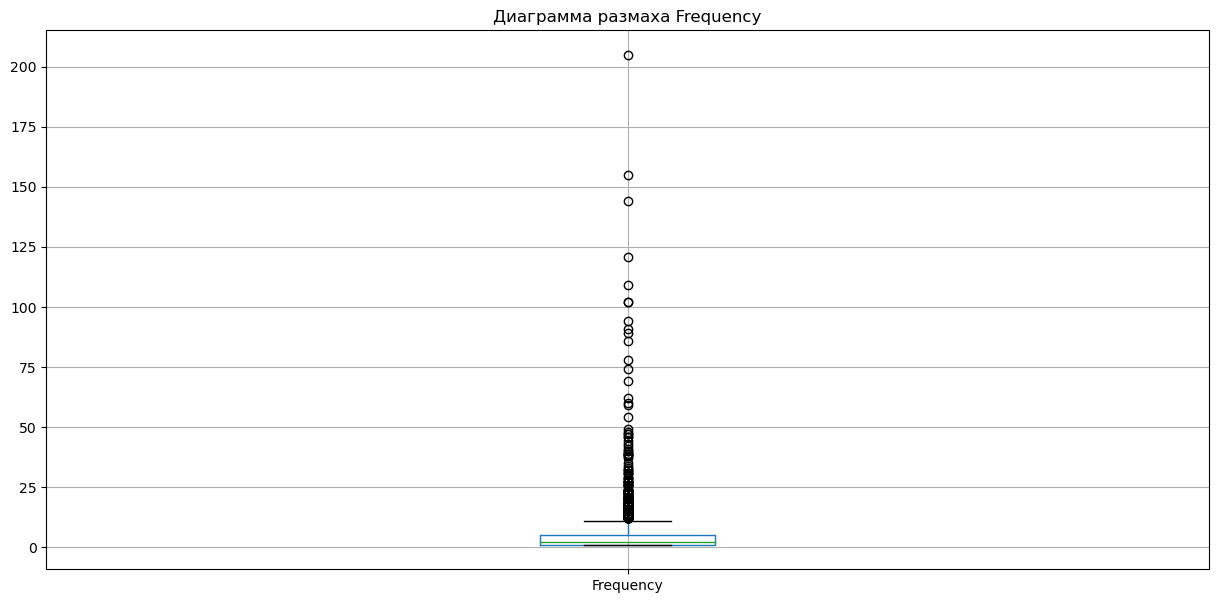

In [22]:
frequency_df.boxplot(column=['Frequency'], figsize=(15,7))
plt.title('Диаграмма размаха Frequency')
plt.show()

In [23]:
quantiles = frequency_df['Frequency'].quantile(q=[0.25,0.5,0.75])
quantiles

0.25    1.0
0.50    2.0
0.75    5.0
Name: Frequency, dtype: float64

In [24]:
print( 'Максимальный показатель Frequency:',frequency_df['Frequency'].max())
print( 'Минимальный показатель Frequency:',frequency_df['Frequency'].min())
print( 'Средний показатель Frequency:',frequency_df['Frequency'].mean())

Максимальный показатель Frequency: 205
Минимальный показатель Frequency: 1
Средний показатель Frequency: 4.455705009276437


In [25]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [26]:
monetary_df = df.groupby(by='Customer ID', as_index=False)['total_price'].sum()
monetary_df.columns = ['customer_id', 'Monetary']
monetary_df.sort_values(by='Monetary', ascending = False).head()

,customer_id,Monetary
4183,18102.0,349164.35
1637,14646.0,248396.50
1269,14156.0,196549.74
1840,14911.0,152121.22
939,13694.0,131443.19


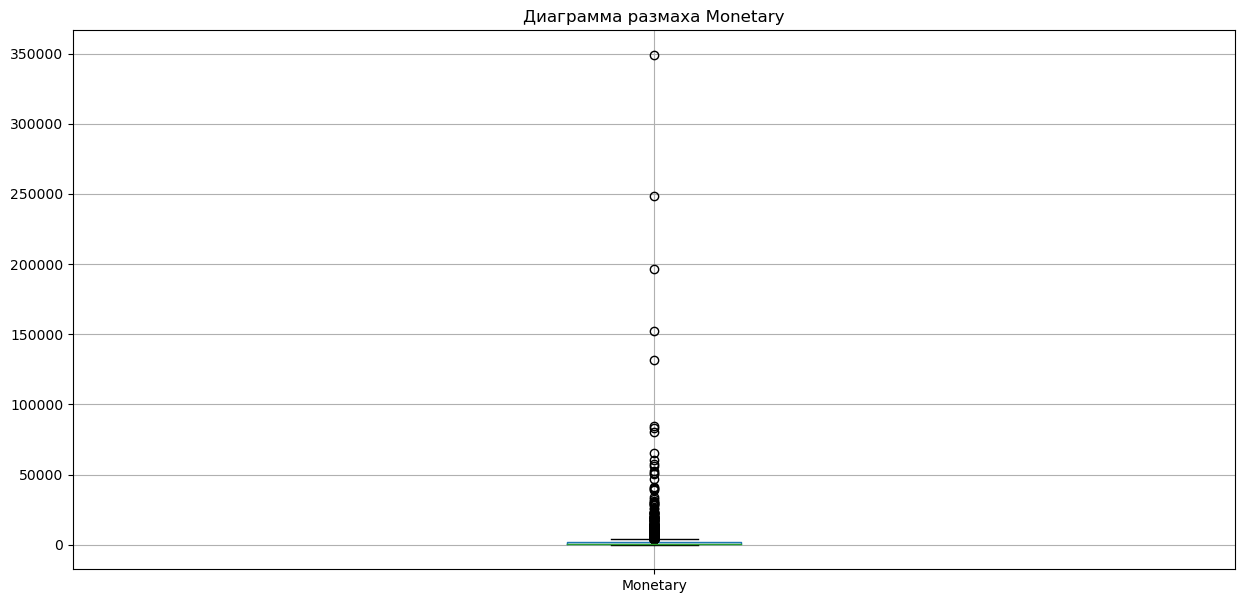

In [27]:
monetary_df.boxplot(column=['Monetary'], figsize=(15,7))
plt.title('Диаграмма размаха Monetary')
plt.show()

In [28]:
quantiles = monetary_df['Monetary'].quantile(q=[0.25,0.5,0.75])
quantiles

0.25     307.1875
0.50     701.6150
0.75    1714.9325
Name: Monetary, dtype: float64

In [29]:
print( 'Максимальный показатель Monetary:',monetary_df['Monetary'].max())
print( 'Минимальный показатель Monetary:',monetary_df['Monetary'].min())
print( 'Средний показатель Monetary:',monetary_df['Monetary'].mean())

Максимальный показатель Monetary: 349164.35
Минимальный показатель Monetary: 2.95
Средний показатель Monetary: 2040.4067124304265


In [30]:
rfm = df_recency.merge(frequency_df, on='customer_id')
rfm = rfm.merge(monetary_df, on='customer_id').drop(
    columns='Last_Purchase_Date')
rfm.sort_values(by = 'Monetary', ascending = False).head()

,customer_id,Recency,Frequency,Monetary
4183,18102.0,0,89,349164.35
1637,14646.0,9,78,248396.50
1269,14156.0,6,102,196549.74
1840,14911.0,0,205,152121.22
939,13694.0,8,94,131443.19


In [31]:
rfm_quantiles = rfm.quantile(q=[0.25,0.5,0.75])
rfm_quantiles

,customer_id,Recency,Frequency,Monetary
0.25,13882.50,17.0,1.0,307.1875
0.50,15350.50,52.0,2.0,701.6150
0.75,16834.25,135.0,5.0,1714.9325


In [32]:
rfm_quantiles = rfm_quantiles.to_dict()
RFM_Segment = rfm.copy()
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <=d[p][0.75]: 
        return 2
    else:
        return 1
    
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency',rfm_quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency',rfm_quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(FM_Class, args=('Monetary',rfm_quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [33]:
RFM_Segment

,customer_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346.0,164,11,372.86,1,4,2,142
1,12347.0,2,2,1323.32,4,2,3,423
2,12348.0,73,1,222.16,2,1,1,211
3,12349.0,42,3,2671.14,3,3,4,334
4,12351.0,10,1,300.93,4,1,1,411
...,...,...,...,...,...,...,...,...
4307,18283.0,17,6,619.37,4,4,2,442
4308,18284.0,66,1,461.68,2,1,2,212
4309,18285.0,295,1,427.00,1,1,2,112
4310,18286.0,111,2,1296.43,2,2,3,223


## Посмотрим на взаимосвязь трех показателей RFM.

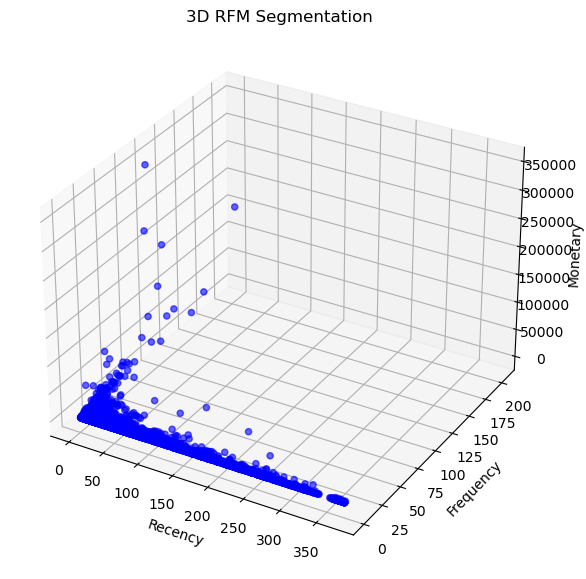

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Отображаем точки
ax.scatter(
    RFM_Segment['Recency'], 
    RFM_Segment['Frequency'], 
    RFM_Segment['Monetary'], 
    c='blue', marker='o', alpha=0.6
)

# Подписываем оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Segmentation')

plt.show()


### Проведем сегментацию клиентов по Recency, чтобы понять, к каким клиентом применять рассылку.

### Клиенты из Сегмента 1 это клиенты, которые совсем недавно делали покупки, по отношению к ним не нужно делать рассылку.  
### Клиенты из Сегмента 2 делали последнюю покупку более 17 дней назад, соответстенно по отношению к ним можно применить простое оповещение с предложением посмотреть товары.  
### Клиенты Сегмента 3 делали последнюю покупку более 52 дней назад, по отношению к ним можно применить оповещение с промо-акцией, либо со скидкой.  
### Клиенты из Сегмента 4 можно считать утерянными, так как последняя покупка была проведена более 135 дней назад. По отношению к ним нету смысла применять оповещения. 

In [35]:
def Rclasss(row):
    if row == 4: 
        return 'Сегмент 1'
    if row == 3:
        return 'Сегмент 2'
    if row == 2:
        return 'Сегмент 3'
    if row == 1:
        return 'Сегмент 4'

    
RFM_Segment['Segment'] = RFM_Segment['R_Quartile'].apply(Rclasss)


RFM_Segment.head()

,customer_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
0,12346.0,164,11,372.86,1,4,2,142,Сегмент 4
1,12347.0,2,2,1323.32,4,2,3,423,Сегмент 1
2,12348.0,73,1,222.16,2,1,1,211,Сегмент 3
3,12349.0,42,3,2671.14,3,3,4,334,Сегмент 2
4,12351.0,10,1,300.93,4,1,1,411,Сегмент 1


### Выведем список этих клиентов для дальнейших маркетинговых манипуляций:

In [36]:
for_marketing_recency = RFM_Segment[['customer_id', 'Segment']].sort_values(by = 'Segment')
for_marketing_recency

,customer_id,Segment
2155,15350.0,Сегмент 1
2125,15301.0,Сегмент 1
2124,15299.0,Сегмент 1
2123,15298.0,Сегмент 1
2118,15291.0,Сегмент 1
...,...,...
269,12776.0,Сегмент 4
3330,16970.0,Сегмент 4
3329,16964.0,Сегмент 4
1893,14983.0,Сегмент 4


### Далее проведем разделение для создания программы лояльности.
### Поделим клиентов на категории "Высокая лояльность", "Средняя лояльность", "Низкая лояльность".


In [37]:
def FMclasss(a, b, c):
    if a > 2 and b > 2 and c > 2: 
        return "Высокая лояльность"
    elif a > 1 and b > 3 and c > 3: 
        return "Высокая лояльность"
    elif a > 1 and b > 1 and c > 1: 
        return "Средняя лояльность"
    elif a > 3 and b > 3 and c > 1:
        return "Средняя лояльность"
    else :
        return "Низкая лояльность"


    
RFM_Segment['Loyalty'] = RFM_Segment.apply(lambda row: FMclasss(row['R_Quartile'], row['F_Quartile'], row['M_Quartile']), axis=1)


RFM_Segment.head()

,customer_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment,Loyalty
0,12346.0,164,11,372.86,1,4,2,142,Сегмент 4,Низкая лояльность
1,12347.0,2,2,1323.32,4,2,3,423,Сегмент 1,Средняя лояльность
2,12348.0,73,1,222.16,2,1,1,211,Сегмент 3,Низкая лояльность
3,12349.0,42,3,2671.14,3,3,4,334,Сегмент 2,Высокая лояльность
4,12351.0,10,1,300.93,4,1,1,411,Сегмент 1,Низкая лояльность


In [38]:
for_marketing_loyalty = RFM_Segment[['customer_id', 'Loyalty']].sort_values(by = 'Loyalty')
for_marketing_loyalty

,customer_id,Loyalty
4311,18287.0,Высокая лояльность
3109,16655.0,Высокая лояльность
1349,14258.0,Высокая лояльность
1348,14257.0,Высокая лояльность
3110,16656.0,Высокая лояльность
...,...,...
3186,16769.0,Средняя лояльность
1261,14145.0,Средняя лояльность
3184,16767.0,Средняя лояльность
3197,16781.0,Средняя лояльность


In [39]:
segments = RFM_Segment.groupby(by='Loyalty', as_index=False)['customer_id'].count()
segments['% of all'] = round(segments['customer_id']/segments['customer_id'].sum()*100,2)
segments.sort_values(by = '% of all')

,Loyalty,customer_id,% of all
2,Средняя лояльность,1003,23.26
0,Высокая лояльность,1370,31.77
1,Низкая лояльность,1939,44.97


# Вывод: 

На основе RFM анализа мы распределили клиентов по показателям частоты покупок, давности покупки и суммы покупок. 
На основании этого мы вывели 4 сегмента для проведения рассылки.

-К 1 сегменту относятся клиенты, которые совсем недавно совершали покупку - на них не стоит распростронять рассылку;

-Сегмент 2 требует ненавязчивую рассылку-напоминаие о себе;

-Сегмент 3 в свою очередь является почти утеренным сегментом клиентов,
по отношению к ним можно применить рассылку с промо-акцией или скидками; 

-Сегмент 4 можно считать утерянным, этот сегмент уже 
не требует рассылки.

Также для разработки программы лояльнольности была проведена сегментация клиентов по всем трем показателям RFM - анализа. 

-Клиенты из сегмента "Высокая лояльность" более склонны к частым и дорогим покупкам, в отношении них можно развить систему дополнительных продаж. 

-Клиенты из сегмента " Средняя лояльность" требует внимания, так как все показатели RFM у этого сегмента находятся по середине. Требует более детального изучения.

-Клиенты из сегмента "Низкая лояльность" не отличается частотой дорогих покупок, требует более детального изучения для понимание специфики этого сегмента.